In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import silhouette_score

# Set global seed
np.random.seed(42)
random.seed(42)



import all relevant unclustered worms

In [66]:
%store -r w0_sorted_new 
%store -r w1_sorted_new
%store -r w2_sorted_new
%store -r w3_sorted_new
%store -r w4_sorted_new
%store -r w5_sorted_new
%store -r w6_sorted_new


In [69]:
print(w2_sorted_new['cell_type'].unique())

[nan 'ON' 'OFF' 'AVA' 'RME' 'SMDV' 'SMDD']


In [55]:
w0_sorted_new['cell_type'] = w0_sorted_new['cell_type'].astype(str).replace(['nan', 'NaN', 'None', ''], np.nan)

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_95403/2977887963.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  w0_sorted_new['cell_type'] = w0_sorted_new['cell_type'].astype(str).replace(['nan', 'NaN', 'None', ''], np.nan)


In [56]:
w0_sorted_new[w0_sorted_new['cell_type'].isna()]


,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,cell_type
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010324,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016547,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,NaN
2,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.360048,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.087835,0.109091,0.091580,0.073719,0.082665,0.075597,0.073550,0.089175,0.065639,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021678,0.019692,0.020166,0.010673,0.019417,0.040118,0.017528,0.027566,0.042480,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.103152,0.097947,0.116510,0.079075,0.089215,0.086892,0.077508,0.078101,0.080784,0.099688,...,0.048487,0.041902,0.070060,0.089901,0.044056,0.059849,0.040118,0.041695,0.085804,NaN
128,0.085950,0.113430,0.125605,0.117232,0.105516,0.113757,0.131102,0.125633,0.105564,0.093432,...,0.078178,0.069748,0.056653,0.052905,0.046551,0.023715,0.048978,0.052017,0.060663,NaN
129,0.024950,0.050220,0.033014,0.005006,0.000000,0.000000,0.000000,0.000263,0.000000,0.000000,...,0.139019,0.136998,0.139518,0.091726,0.097137,0.072485,0.085110,0.069823,0.068418,NaN
130,0.086319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036027,...,0.142133,0.096184,0.098240,0.094094,0.052114,0.084556,0.088716,0.043587,0.079113,NaN


In [70]:
worms = [w0_sorted_new, w1_sorted_new, w2_sorted_new, w3_sorted_new, w4_sorted_new, w5_sorted_new, w6_sorted_new]

In [71]:
worms = [w0_sorted_new, w1_sorted_new, w2_sorted_new, w3_sorted_new, w4_sorted_new, w5_sorted_new, w6_sorted_new]
nan_worms = []
for i in range(7):
    worms[i] = worms[i].copy()
    # worms[i]['cell_type'] = worms[i]['cell_type'].astype(str).replace(['nan', 'NaN', 'None', ''], np.nan)
    worms[i].reset_index(drop=True, inplace=True)
    nan_worm = worms[i][worms[i]['cell_type'].isna()]
    nan_worms.append(nan_worm)

    


In [78]:
# Step 1: Concatenate all NaN rows from different worms into one DataFrame
combined_nan_worms = pd.concat(nan_worms, axis=0, ignore_index=True)


In [80]:
numeric_data = combined_nan_worms.select_dtypes(include=['number'])


In [82]:
#normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [94]:
# Step 5: Find optimal k using the Elbow Method
def find_optimal_k(data, k_range=(2, 10)):
    inertia = []
    for k in range(k_range[0], k_range[1]):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.plot(range(k_range[0], k_range[1]), inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()


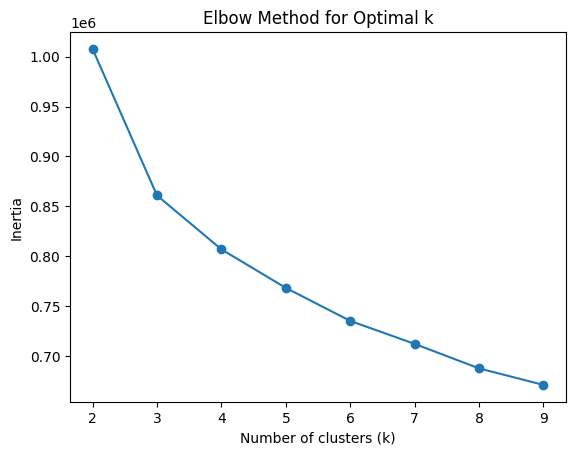

In [84]:
find_optimal_k(scaled_data)

In [100]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)
combined_nan_worms['cluster'] = cluster_labels

In [101]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=4: 0.139


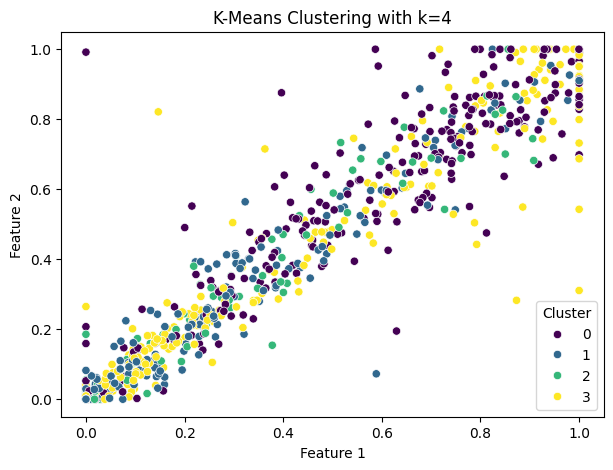

In [102]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=combined_nan_worms.iloc[:, 0], 
                y=combined_nan_worms.iloc[:, 1], 
                hue=combined_nan_worms['cluster'], 
                palette='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering with k={k}")
plt.legend(title="Cluster")
plt.show()

# Using HMDS Coords

In [103]:
%store -r w0_3d_pcoords
%store -r w0_8d_pcoords
%store -r w1_3d_pcoords
%store -r w1_8d_pcoords
%store -r w2_3d_pcoords
%store -r w2_8d_pcoords
%store -r w3_3d_pcoords
%store -r w3_8d_pcoords
%store -r w4_3d_pcoords
%store -r w4_8d_pcoords
%store -r w5_3d_pcoords
%store -r w5_8d_pcoords
%store -r w6_3d_pcoords
%store -r w6_8d_pcoords

In [104]:
w0_3d_pcoords

,0,1,2,cell_type
0,0.705415,0.023343,0.683786,NaN
1,-0.164038,0.853489,-0.448758,NaN
2,-0.412773,0.596391,-0.643151,NaN
3,0.921031,-0.198335,-0.202447,NaN
4,0.016148,0.894327,0.398801,NaN
...,...,...,...,...
127,0.919519,0.069859,-0.288681,RME
128,0.905629,0.139908,-0.302094,RME
129,0.428784,0.430973,-0.761704,SMDV
130,0.944079,-0.014348,0.238772,SMDV


In [105]:
worms_hyperbolic = [w0_3d_pcoords, w1_3d_pcoords, w2_3d_pcoords, w3_3d_pcoords, w4_3d_pcoords, w5_3d_pcoords, w6_3d_pcoords]
nan_worms_hyperbolic = []
for i in range(7):
    worms_hyperbolic[i] = worms_hyperbolic[i].copy()
    # worms[i]['cell_type'] = worms[i]['cell_type'].astype(str).replace(['nan', 'NaN', 'None', ''], np.nan)
    worms_hyperbolic[i].reset_index(drop=True, inplace=True)
    nan_worm_hyperbolic = worms_hyperbolic[i][worms_hyperbolic[i]['cell_type'].isna()]
    nan_worms_hyperbolic.append(nan_worm_hyperbolic)

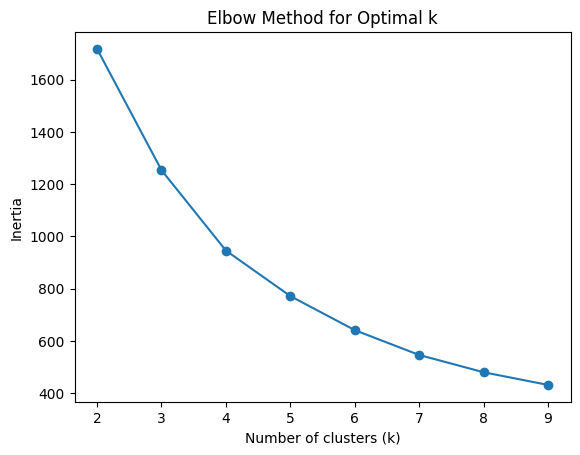

In [106]:
combined_nan_worms_hyp = pd.concat(nan_worms_hyperbolic, axis=0, ignore_index=True)
numeric_data_hyp = combined_nan_worms_hyp.select_dtypes(include=['number'])
scaled_data_hyp = scaler.fit_transform(numeric_data_hyp)
find_optimal_k(scaled_data_hyp)


In [117]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels_hyp = kmeans.fit_predict(scaled_data_hyp)
combined_nan_worms_hyp['cluster'] = cluster_labels_hyp

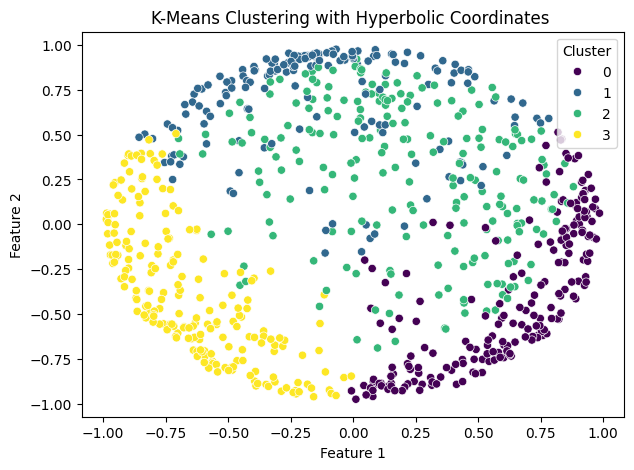

In [118]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=combined_nan_worms_hyp.iloc[:, 0], 
                y=combined_nan_worms_hyp.iloc[:, 1], 
                hue=combined_nan_worms_hyp['cluster'], 
                palette='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering with Hyperbolic Coordinates ")
plt.legend(title="Cluster")
plt.show()

In [124]:
%store -r w0_sorted_new
%store -r w1_sorted_new
%store -r w2_sorted_new
%store -r w3_sorted_new
%store -r w4_sorted_new
%store -r w5_sorted_new
%store -r w6_sorted_new


In [128]:
traces = pd.DataFrame(np.concatenate([w0_sorted_new, w1_sorted_new, w2_sorted_new, w3_sorted_new, w4_sorted_new, w5_sorted_new, w6_sorted_new], axis=0))

In [129]:
traces

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010324,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016547,0.022308,0.021005,0.025381,0.005841,0.00475,0.016866,0.017452,0.02815,NaN
2,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.360048,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087835,0.109091,0.09158,0.073719,0.082665,0.075597,0.07355,0.089175,0.065639,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021678,0.019692,0.020166,0.010673,0.019417,0.040118,0.017528,0.027566,0.04248,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,0.451667,0.260361,0.374523,0.333417,0.296303,0.298341,0.353166,0.275606,0.33789,0.325894,...,0.146509,0.106031,0.075282,0.125328,0.123972,0.106423,0.056287,0.071927,0.138741,RME
938,0.161421,0.122925,0.15224,0.113289,0.108943,0.120792,0.113263,0.112031,0.109941,0.129438,...,0.023911,0.022255,0.019681,0.03776,0.027895,0.01142,0.013922,0.007703,0.034923,SMDV
939,0.369088,0.340746,0.31479,0.297447,0.25654,0.212337,0.201304,0.296253,0.233145,0.227632,...,0.079672,0.034247,0.069591,0.087507,0.083285,0.035668,0.048541,0.059006,0.046408,SMDV
940,0.091142,0.103064,0.103241,0.086204,0.096538,0.102718,0.094449,0.066989,0.092214,0.087939,...,0.135084,0.181331,0.162653,0.182036,0.159335,0.197864,0.206459,0.220786,0.211384,SMDD


In [131]:
cluster_2_ids = combined_nan_worms_hyp[combined_nan_worms_hyp['cluster'] == 0].index

In [136]:
cluster_2 = traces.loc[cluster_2_ids, traces.columns[:-1]]


In [137]:
cluster_2

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013149,0.010324,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08246,0.087835,0.109091,0.09158,0.073719,0.082665,0.075597,0.07355,0.089175,0.065639
10,0.243677,0.211156,0.12199,0.192115,0.097183,0.08866,0.081008,0.057324,0.053315,0.0,...,0.113168,0.148958,0.154519,0.13278,0.087997,0.113076,0.088234,0.082167,0.135665,0.031471
16,0.098183,0.030122,0.014219,0.039266,0.963115,0.030511,0.9662,1.0,0.908288,0.909461,...,0.173642,0.166378,0.209448,0.225698,0.146615,0.189889,0.177832,0.167297,0.178185,0.178365
17,0.717732,0.696895,0.677064,0.712047,0.708994,0.722651,0.710954,0.773423,0.739274,0.797107,...,0.228096,0.232883,0.287223,0.251161,0.257923,0.266113,0.30635,0.286567,0.30487,0.311462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.101532,0.135086,0.121217,0.114503,0.13092,0.069449,0.11748,0.08861,0.129417,0.116269,...,0.0,0.0,0.0,0.002133,0.0,0.0,0.0,0.0,0.0,0.0
800,0.995201,0.967775,1.0,0.984237,0.907645,0.936305,0.909152,0.906171,0.90282,0.821265,...,0.501593,0.503267,0.50313,0.489466,0.49551,0.49284,0.483055,0.44528,0.334368,0.278316
801,1.0,0.963049,0.897012,0.9346,0.921921,0.92079,0.863237,0.889204,0.8986,0.827695,...,0.240156,0.320638,0.318161,0.328143,0.351052,0.347087,0.398372,0.405819,0.374204,0.340095
802,0.911205,0.926057,0.969877,0.891566,0.918021,0.81211,0.855253,0.793332,0.912529,0.811599,...,0.667293,0.655009,0.661811,0.732733,0.711736,0.652137,0.627134,0.554656,0.58255,0.550446


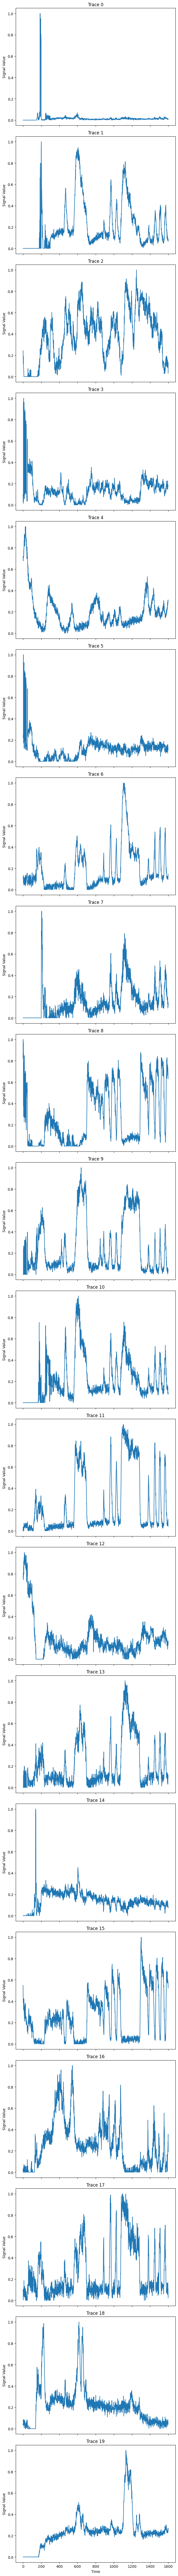

In [157]:

num_plots = min(len(cluster_2), 20)  # Limit to 20 subplots max

fig, axes = plt.subplots(nrows=num_plots, figsize=(7, 5 * num_plots), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(cluster_2.iloc[i, :])
    ax.set_title(f"Trace {i}")
    ax.set_ylabel("Signal Value")

axes[-1].set_xlabel("Time")  # Set x-label only on last subplot
plt.tight_layout()
plt.show()